# Part 4: Query entity embeddings in Gensim

This notebook illustrates how to query the entity embedding model in `gensim.Word2Vec`

Presentation for GraphGeeks.org on 2024-08-14

In [1]:
import gensim
import matplotlib.pyplot as plt
import pandas as pd

W2V_MODEL: str = "data/entity.w2v"

w2v_model: gensim.models.Word2Vec = gensim.models.Word2Vec.load(W2V_MODEL)

In [2]:
query: str = "NOUN.dementia"

In [3]:
df: pd.DataFrame = pd.DataFrame([
    {
        "entity": neighbor[0],
        "distance": neighbor[1],
    }
    for neighbor in w2v_model.wv.most_similar(positive = [ query ], topn = 10)
    if neighbor[1] > 0.0
])

df

,entity,distance
0,ADJ.rigorous ADJ.scientific NOUN.research,0.299229
1,DET.the PROPN.uk,0.245211
2,PROPN.alzheimer,0.229894
3,PROPN.aaic,0.221234
4,NOUN.pea,0.205359
5,"NUM.11,173 NOUN.dementia NOUN.case",0.201278
6,NOUN.meat NOUN.consumption,0.185059
7,NOUN.preservative,0.182665
8,NOUN.nut CCONJ.and NOUN.legume,0.161436
9,DET.the PROPN.alzheimer PART.'s PROPN.association,0.154982


Neighbors with distances approaching zero tend to be _synonyms_, while those with distances above the mean tend to be _semantically related_.

In [4]:
df.distance.mean()

0.20863482654094695

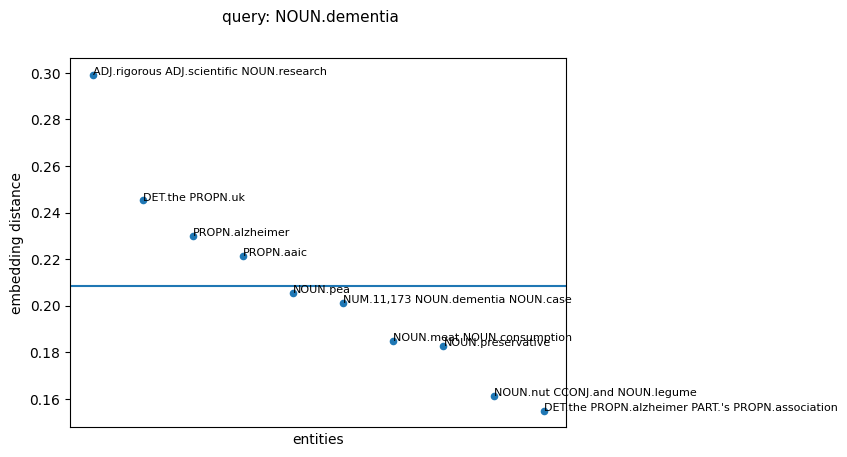

In [5]:
fig, ax = plt.subplots()

fig.suptitle(
    f"query: {query}",
    fontsize = 11,
)

df.plot(
    "entity",
    "distance",
    kind = "scatter",
    ax = ax,
)

for index, row in df.iterrows():
    ax.annotate(
        row["entity"],
        (row["entity"], row["distance"]),
        size = 8,
    )

plt.xticks([])
ax.set_xlabel("entities")
ax.set_ylabel("embedding distance")

plt.axhline(y = df.distance.mean())

plt.show()